#                                                 Assignment 3

# Fulin Guo

1. Read the paper, Moretti (2002), and write a one-to-two-page paper responding to the following questions

The validity of a simulative model is very important. It depends on the validity of the theory the model is based on and the validity of the computational tools. There are potential weaknesses in validity in some techniques of simulation. In multi-agent systems, we need to have a theory about the individuals in the system and then utilize this theory to conduct simulation to see what structures emerge in the system that are not included in the initial individual settings. Therefore, if the definition and theory of individuals (i.e., the theory of individuals’ actions, motivations, decision-making process in response to other individuals and the environments) is not reasonable, the validity of the simulation would be a potential problem. 

In cellular automata, we update the states synchronously. The assumption is that all cells are updated simultaneously based on a global clock. However, this assumption might not be realistic in social sciences. Another drawback is the definition of neighborhoods in cellular automata. Interaction does not exist only between individuals that are physically near each other. In addition, the neighborhood of an individual changes over time, so it is important to consider this aspect to ensure the validity of the simulation; otherwise, the simulation might not be valid.

Dynamic feedback is an important characteristic in many social phenomena. In the paper that the author cites, Nowak, M. A., & Lewenstein, M. (1996), Modeling social change with cellular automata, the model that depicts the emergence and change of public opinion exhibits dynamic feedback: If some events happen or some conditions in the society change (stimulus), public opinion or attitude will change, and this change of public opinion will thereby change the social condition. For example, at time 0, very few people in the public think that opening a new car corporation is profitable (negative attitude toward entering into the auto industry is the majority). At time 1, a new technique of manufacturing cars is invented. This stimulus will influence many people’s attitude, so more people will think that opening a car corporation can earn a lot of profits (positive attitude is the majority). However, at time 2, as more people have entered into the auto industry, individuals in the society will believe that opening a car corporation has become less profitable (negative attitude is the majority again). We can see from the example that the initial stimulus (invention of technique) can change people’s behavior (attitudes toward opening a car corporation), and then that change in behavior creates new stimulus (more car corporations in the society) which in turn causes further behavior change (public attitudes).

In political science, many systems also exhibit dynamic feedback. For example, think about the research question: How media publicity influences people’s participation in political votes? The system of this question can exhibit dynamic feedback: Suppose in time 0, a stimulus causes the decrease of media publicity in Chicago, which results in less participation in a political vote (because less people know there is a political election). Then, the Chicago media decides to increase the publicity next time (because they see the decrease of the vote turnout and think they have the responsibility to let more people be aware of the next election), which will in turn cause the rise of participation in the political vote next time. 


2. Simulating your income 

a. I conducted 10,000 simulations by coding in python, and here is the codes.

Text(0,0.5,'Income (\\$)')

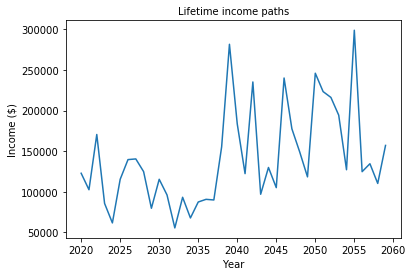

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import MultipleLocator
year=40
mu=year*[0]
si=0.13
siga=si*np.eye(year)
samplenum=10000
inc0=80000
g=0.025
rho=0.4
s=np.random.multivariate_normal(mu,siga,samplenum)
inc=[]
year_sta=2020
year_end=2059
for i in range(0,samplenum):
    inc.append([])
    for j in range(0,year):
        if j==0:
            inc[i].append(math.exp(math.log(inc0)+s[i][j]))
        else:        
            inc[i].append(math.exp((1-rho)*(math.log(inc0)+g*j)+rho*math.log(inc[i][j-1])+s[i][j]))
year_vec=list(range(year_sta,year_end+1))
plt.plot(year_vec, inc[0])
plt.title('Lifetime income paths', fontsize=10)
plt.xlabel(r'Year')
plt.ylabel(r'Income (\$)')
        

b.	This is the codes for plotting the histogram with 50 bins of year t=2020 initial income for each of the 10,000 simulations.

The percent of students that will earn more than $100,000 in the first year: 0.2675
The percent of students that will earn less than $70,000 in the first year: 0.3625


Text(0.5,1,'Distribution of income in 2020')

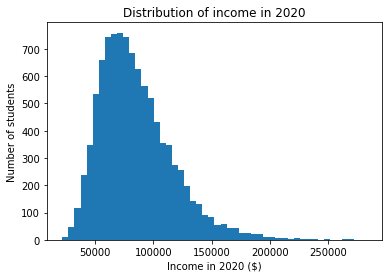

In [6]:
inc2020=[]
for i in range(0,samplenum):
    inc2020.append(inc[i][0])
greater_100000=0
less_70000=0
for i in inc2020:
    if i>100000:
        greater_100000+=1
    elif i<70000:
        less_70000+=1
print('The percent of students that will earn more than $100,000 in the first year: '+str(greater_100000/samplenum))
print('The percent of students that will earn less than $70,000 in the first year: '+str(less_70000/samplenum))
plt.hist(inc2020, bins=50)
plt.xlabel(r"Income in 2020 (\$)")
plt.ylabel("Number of students")
plt.title("Distribution of income in 2020")

I record the number of students’ income that is greater than 100,000 and less than 70,000 respectively. 26.75% students will earn more than $100,000 in 2020 and 36.25 students will earn less than 70,000 in 2020.
From the picture, the distribution is not normal. Although when incomes depart from the mode, the frequency decreases, the distribution is positively skewed as the income is a log-normal distribution LN (0,), which results in the positively skewness of the distribution of income. It can be seen from the above figure that the right tail of the distribution is longer and there are more incomes on the left of the figure. The mean of the distribution is larger than the median, and the median is larger than the mode.

c. Here is the code for plotting the histogram of how many years it takes to pay off the loan in each of your 10,000 simulations.

The percent of students that can pay off the loan in 10 years: 0.4812


Text(0.5,1,'The years to pay off the load')

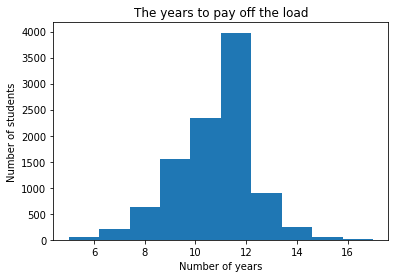

In [8]:
pay_year=[]
for i in range(0,samplenum):
    sum=0
    j=0
    while sum<95000:
        sum+=inc[i][j]*0.1
        j+=1
    pay_year.append(j)
less_10=0
for i in pay_year:
    if i<=10:
        less_10+=1
print('The percent of students that can pay off the loan in 10 years: '+ str(less_10/samplenum))
plt.hist(pay_year)
plt.xlabel("Number of years")
plt.ylabel("Number of students")
plt.title("The years to pay off the load")

I recorded the percent of the years that are less than or equal to 10. There are 48.12% simulations that I am able to pay off the load in 10 years.

d. Here are the codes for plotting the new histogram of how many years it takes to pay off your loan of 95,000 in your new 10,000 simulations with the new standard deviation and the new average initial salary.

In [9]:
year=40
mu=year*[0]
si=0.17
siga=si*np.eye(year)
samplenum=10000
inc0=90000
g=0.025
rho=0.4
s=np.random.multivariate_normal(mu,siga,samplenum)
inc=[]
year_sta=2020
year_end=2059
for i in range(0,samplenum):
    inc.append([])
    for j in range(0,year):
        if j==0:
            inc[i].append(math.exp(math.log(inc0)+s[i][j]))
        else:        
            inc[i].append(math.exp((1-rho)*(math.log(inc0)+g*(j))+rho*math.log(inc[i][j-1])+s[i][j]))

The percent of students that can pay off the loan in 10 years: 0.7184


Text(0.5,1,'The years to pay off the load')

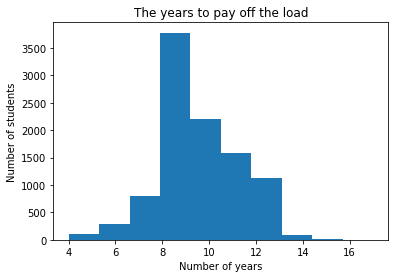

In [10]:
pay_year=[]
for i in range(0,samplenum):
    sum=0
    j=0
    while sum<95000:
        sum+=inc[i][j]*0.1
        j+=1
    pay_year.append(j)
less_10=0
for i in pay_year:
    if i<=10:
        less_10+=1
print('The percent of students that can pay off the loan in 10 years: '+ str(less_10/samplenum))
plt.hist(pay_year)
plt.xlabel("Number of years")
plt.ylabel("Number of students")
plt.title("The years to pay off the load")

It can be seen from the above figure that more students can pay off the loans in less years. Particularly, the percent of simulations where students pay off the loans in 10 years is 71.84%, compared to 48.12% in former case.